In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Fill the missing data values

In [8]:
data = data.fillna(method='ffill')

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Check and remove outliers

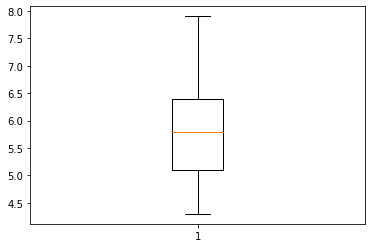

In [10]:
plt.boxplot(data['SL'])
plt.show()

There are no outliers in column SL

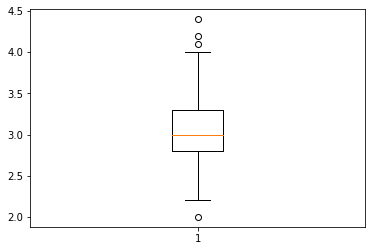

In [11]:
plt.boxplot(data['SW'])
plt.show()

In [12]:
#calculating percentiles
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',Q2,'\nQ3 = ',Q3)

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.3


In [13]:
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  0.5


In [14]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  4.05 
Lower limit =  2.05


In [15]:
outlier=[]
for i in data['SW']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
print(outlier)

[4.4, 4.1, 4.2, 2.0]


In [16]:
data.drop(data.loc[(data['SW']>up_lim ) | (data['SW']<low_lim)].index,inplace=True)

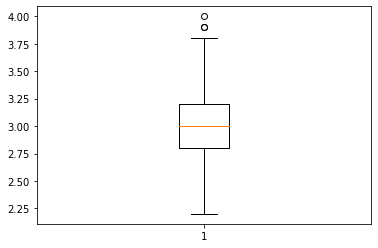

In [17]:
plt.boxplot(data['SW'])
plt.show()

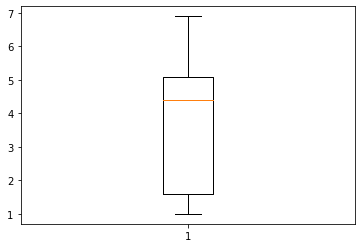

In [18]:
plt.boxplot(data['PL'])
plt.show()

There are no outliers in column PL

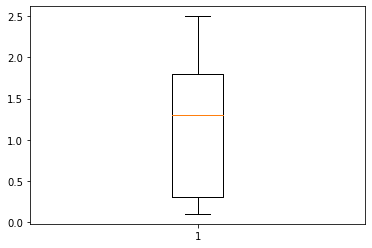

In [19]:
plt.boxplot(data['PW'])
plt.show()

There are no outliers in column PW

### Convert categorical values to numerical values

In [20]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

In [21]:
data['Classification'] = label_en.fit_transform(data['Classification'])

In [22]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split the dataset

In [23]:
x = data.drop(['Classification'],axis=1)
y = data['Classification']

### Scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler
stan_scal = StandardScaler()

In [25]:
x = stan_scal.fit_transform(x)
x = pd.DataFrame(x)

### Splitting data into train and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [29]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('Recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
f1 score is: 0.9666666666666667


In [30]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

Confusion matrix
 [[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


### KNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

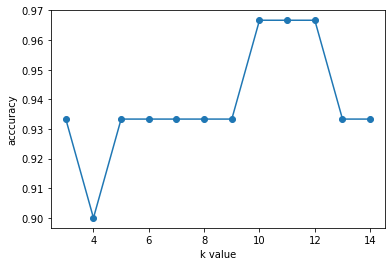

In [32]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')
plt.show()

In [33]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [34]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('Recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9333333333333333
Precision is: 0.9333333333333333
Recall is: 0.9333333333333333
f1 score is: 0.9333333333333333


### Support vector machines

In [35]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)

In [36]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('Recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
f1 score is: 0.9666666666666667


### Random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [40]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('Recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9333333333333333
Precision is: 0.9333333333333333
Recall is: 0.9333333333333333
f1 score is: 0.9333333333333333


Logistic regression model and SVM gives the best result to predict iris species